In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data
df=pd.read_csv('10.customerchurn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#by seeing we can drop the column customer_id which is not needed, let's check any duplicates are present before dropping
df['customerID'].nunique()

7043

Confirmed no duplicates

In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Total charges column is being showed as object , but data in it is numerical. So let us fix this first

In [6]:
df['TotalCharges'].nunique()

6531

There are 6531 unique values

In [7]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
109.3       1
44.05       1
1490.4      1
702         1
4085.75     1
Name: TotalCharges, Length: 6531, dtype: int64

we can see there are some blank spaces

Total charges can't be blank , the data might be missed during entry.

In [8]:
df.loc[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
#let us fill these places 
df['TotalCharges'].replace(" ",np.nan,inplace=True)

In [10]:
df['TotalCharges'].isnull().sum()

11

Now we have 11 null values in this column.

In [11]:
df['TotalCharges'].skew()

0.961642499724251

The column is not normally distributed. So let us fill the missing columns with median or drop the rows. I choose to drop since 11 rows doesn't even be 1% of our tot. data

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(7032, 20)

In [14]:
df['TotalCharges']=df['TotalCharges'].astype('float')

now we have 7032 rows and 20 columns

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

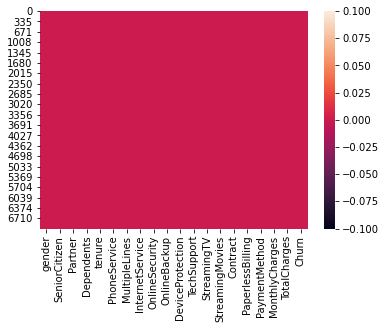

In [15]:
#Checking for null values
sns.heatmap(df.isnull())
df.isnull().sum()

No null values

In [16]:
#Exploring each column
df['gender'].nunique()

2

Male      3549
Female    3483
Name: gender, dtype: int64

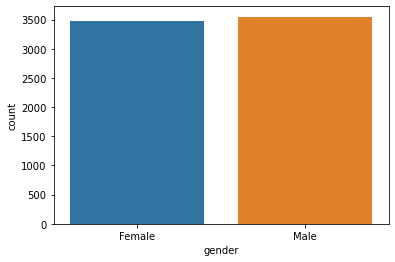

In [17]:
sns.countplot(df['gender'])
df['gender'].value_counts()

almost equal ratio of male and female customers - Nominal data , i.e Binary class

In [18]:
#Making instance and encoding
df1=df

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df1['gender']=le.fit_transform(df1['gender'])

df1['gender'].value_counts()

1    3549
0    3483
Name: gender, dtype: int64

we can see male encoded as 1 and female encoded as 0

In [19]:
df['SeniorCitizen'].nunique()

2

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

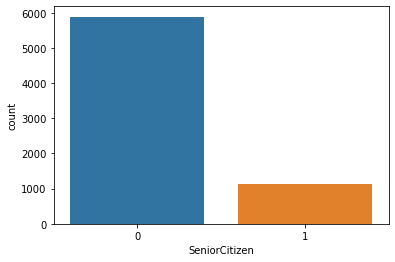

In [20]:
sns.countplot(df['SeniorCitizen'])
df['SeniorCitizen'].value_counts()

Majority of customers are young. Not senior citizens

In [21]:
df['Partner'].nunique()

2

No     3639
Yes    3393
Name: Partner, dtype: int64

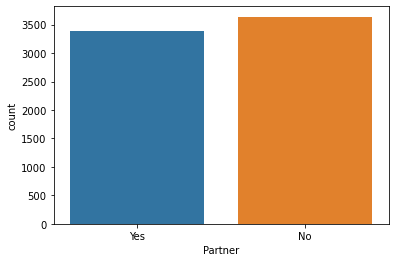

In [22]:
sns.countplot(df['Partner'])
df['Partner'].value_counts()

Not partners are little more than the partners in our customers.Let us encode this

In [23]:
df1['Partner']=le.fit_transform(df1['Partner'])

In [24]:
df['Partner'].value_counts()

0    3639
1    3393
Name: Partner, dtype: int64

No is encoded as 0 and Yes is encoded as 1

In [25]:
df['Dependents'].nunique()

2

No     4933
Yes    2099
Name: Dependents, dtype: int64

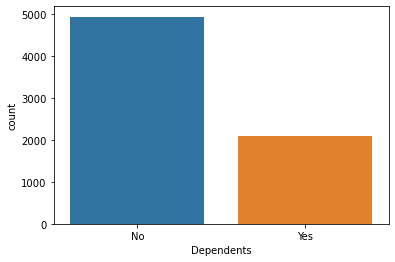

In [26]:
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

Many of the customers doesn't have dependents

In [27]:
df1['Dependents']=le.fit_transform(df1['Dependents'])
df1['Dependents'].value_counts()

0    4933
1    2099
Name: Dependents, dtype: int64

No is encoded as 0 and Yes is encoded as 1

In [28]:
df['tenure'].nunique()

72

tenure is a numerical column, where the customer tenure with us is specified

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

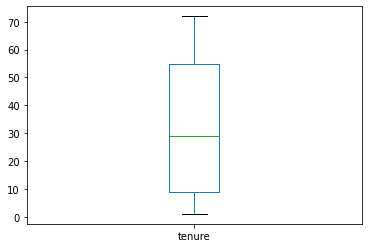

In [29]:
df['tenure'].plot.box()
df['tenure'].describe()

From this we can see , the avg. span of customers with us is 32.4 months, max. of 72 months/weeks, min. is 1 month. 50 percentile of customers are less than 29 months in our customers

In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
df['PhoneService'].nunique()

2

Yes    6352
No      680
Name: PhoneService, dtype: int64

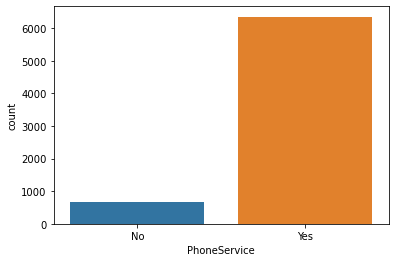

In [32]:
sns.countplot(df['PhoneService'])
df['PhoneService'].value_counts()

In [33]:
6352/(6352+680)

0.9032992036405005

90% of customers are using phone services 

In [34]:
df1['PhoneService']=le.fit_transform(df1['PhoneService'])

encoded

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

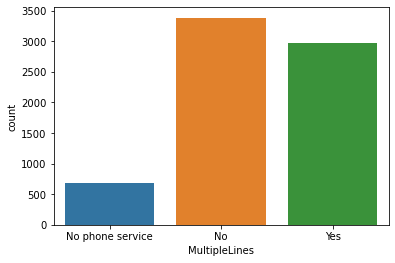

In [35]:
sns.countplot(df['MultipleLines'])
df['MultipleLines'].value_counts()

In [36]:
2967/7032

0.42192832764505117

In [37]:
680/7032

0.09670079635949944

only 42% of customers opted for multiple lines and 10% customers has not opted for phone service.

In [38]:
df1['MultipleLines']=le.fit_transform(df['MultipleLines'])

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

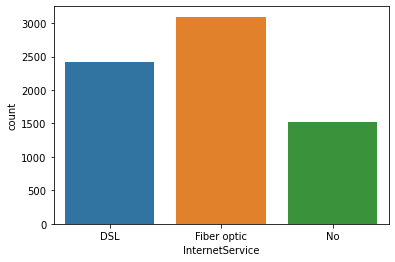

In [39]:
sns.countplot(df['InternetService'])
df['InternetService'].value_counts()

In [40]:
1520/7032

0.2161547212741752

In [41]:
2416/7032

0.3435722411831627

22% customers are not using the internet services. , in 88% customers only 34% of them are using DSL.. remaining are using FiberOptic

In [42]:
categorical_cols=['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

OnlineSecurity:
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
OnlineBackup:
 No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
DeviceProtection:
 No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
TechSupport:
 No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
StreamingTV:
 No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64
StreamingMovies:
 No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64
Contract:
 Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
PaperlessBilling:
 Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
Payme

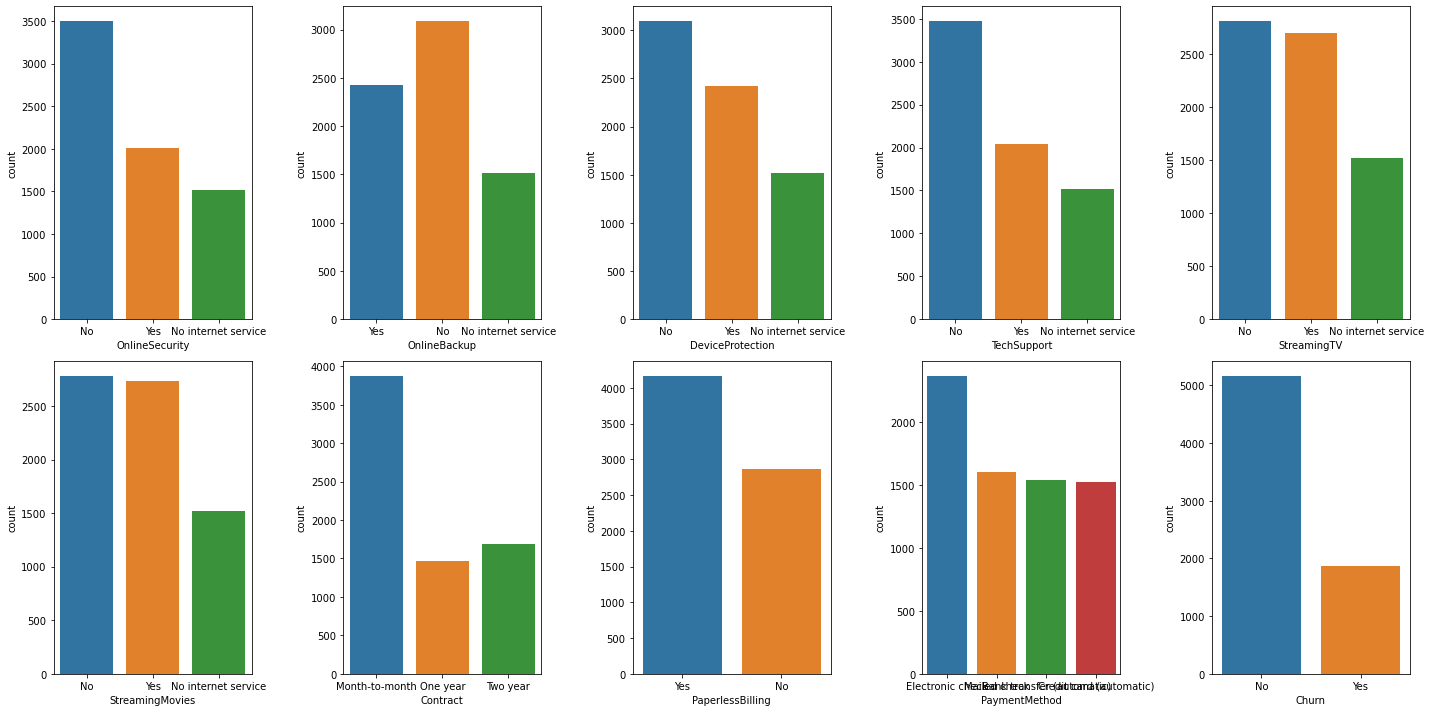

In [43]:
plt.figure(figsize=(20,10))
n=1
for i in categorical_cols:
    if n<11:
        print(f'{i}:\n',df[i].value_counts())
        ax=plt.subplot(2,5,n)
        sns.countplot(df[i])
        plt.xlabel(i)
    n+=1
plt.tight_layout()

In [44]:
#Encoding the columns:
for i in categorical_cols:
    df1[i]=le.fit_transform(df1[i])

In [45]:
df1['InternetService']=le.fit_transform(df1['InternetService'])

In [46]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

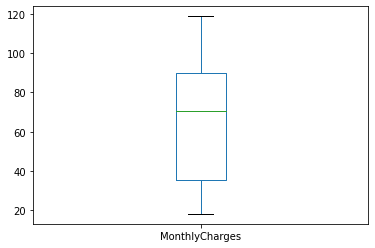

In [47]:
df['MonthlyCharges'].plot.box()
df['MonthlyCharges'].describe()

-0.22210292770166232

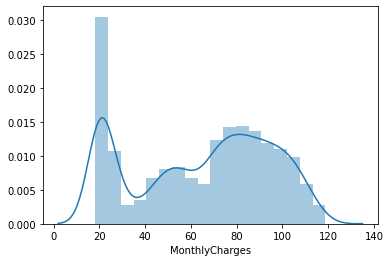

In [48]:
sns.distplot(df['MonthlyCharges'])
df['MonthlyCharges'].skew()

Skewness in acceptable range 

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

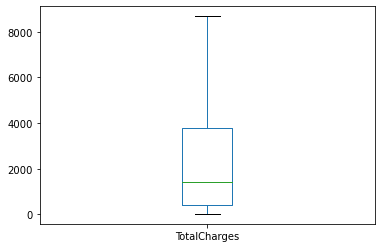

In [49]:
df['TotalCharges'].plot.box()
df['TotalCharges'].describe()

2283 is the avg. tot. charge, 19 is the least charge

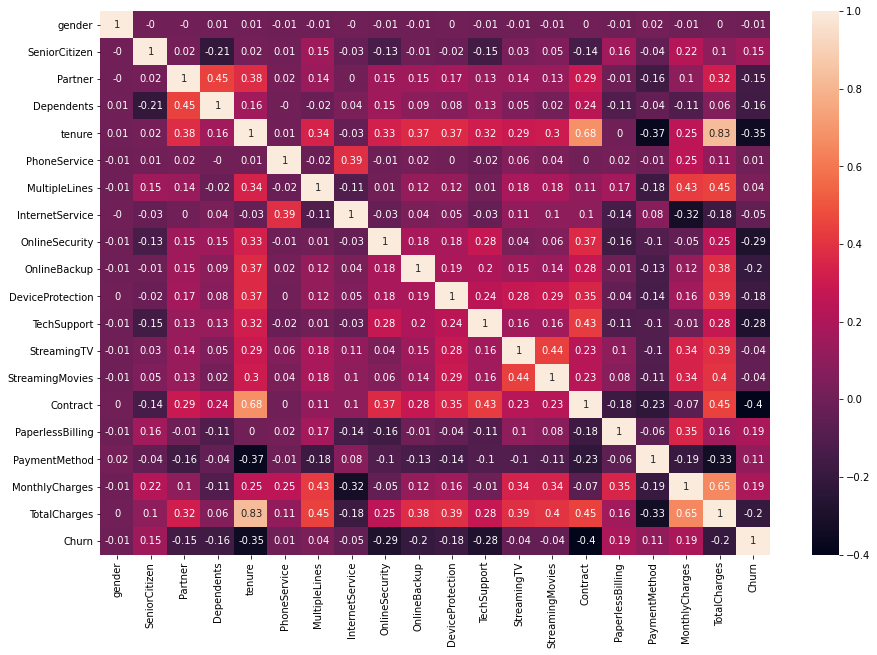

In [50]:
#Let us see the correlation
cor=round(df1.corr(),2)
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)


In [51]:
df1.drop(['Partner','Contract','MonthlyCharges'],axis=1,inplace=True)

In [52]:
#Checking and removing outliers
from scipy.stats import zscore
z=abs(zscore(df1))
threshold=3
df_new=df1[(z<3).all(axis=1)]
df_new.shape

(6352, 17)

In [53]:
6352/7032

0.9032992036405005

10% of data is lost

In [54]:
#Split x and y
x=df_new.drop('Churn',axis=1)
y=df_new['Churn']

In [55]:
#Scaling the x 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

we seen the dataset is imbalanced. Let us balance it.

In [56]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_balanced,y_balanced=smt.fit_resample(x_scaled,y)

now the dataset is balanced

In [57]:
y_balanced.value_counts()

1    4653
0    4653
Name: Churn, dtype: int64

Equal number of data wrt to churn customers

In [58]:
#Let us import and split x y at best random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

lo=LogisticRegression()
rs=0
acsc=0

for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=i)
    lo.fit(x_train,y_train)
    pred=lo.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>acsc:
        acsc=acc
        rs=i
print(f'Best score:{acsc}\n random state: {rs}')

Best score:0.7862513426423201
 random state: 87


best score is 80 at random state 471

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=471)

In [60]:
#importing other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [61]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'{m}:')
    print('accuracy score:',accuracy_score(y_test,predm))
    print('confusion matrix:\n',confusion_matrix(y_test,predm))
    print('classification report:\n',classification_report(y_test,predm))
    cvscore=cross_val_score(m,x_balanced,y_balanced,cv=5)
    print('mean cv score:',cvscore.mean())
    print('\n')

LogisticRegression():
accuracy score: 0.7733619763694952
confusion matrix:
 [[678 231]
 [191 762]]
classification report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       909
           1       0.77      0.80      0.78       953

    accuracy                           0.77      1862
   macro avg       0.77      0.77      0.77      1862
weighted avg       0.77      0.77      0.77      1862

mean cv score: 0.7620900143195941


SVC():
accuracy score: 0.8093447905477981
confusion matrix:
 [[720 189]
 [166 787]]
classification report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       909
           1       0.81      0.83      0.82       953

    accuracy                           0.81      1862
   macro avg       0.81      0.81      0.81      1862
weighted avg       0.81      0.81      0.81      1862

mean cv score: 0.7897070918641502


DecisionTreeClassifier():
accuracy score: 0

Random forest classifier has the least difference between cv score and f1 score

In [63]:
#Hyper parameter tuning of Ridge regression
from sklearn.model_selection import GridSearchCV

par={'n_estimators':range(100,500,100),'criterion':['gini','entropy'],'max_depth':range(0,10,5),'min_samples_split':range(2,20,4),
     'min_samples_leaf':range(1,5),'max_features':['auto']}

grid=GridSearchCV(RandomForestClassifier(),param_grid=par,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time

C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
800 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 441, in fit
    trees = Parallel(
  File "C:\Users\Lucky Girish\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Luck

Best score: 0.7857309336568526
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=10)
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [93]:
rf=RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3,
                       min_samples_split=10,max_features='auto',n_estimators=200,random_state=487)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

accuracy: 0.8415682062298604
confusion matrix: [[749 160]
 [135 818]]
classification report:               precision    recall  f1-score   support

           0       0.85      0.82      0.84       909
           1       0.84      0.86      0.85       953

    accuracy                           0.84      1862
   macro avg       0.84      0.84      0.84      1862
weighted avg       0.84      0.84      0.84      1862



accuracy increased from 83 to 84

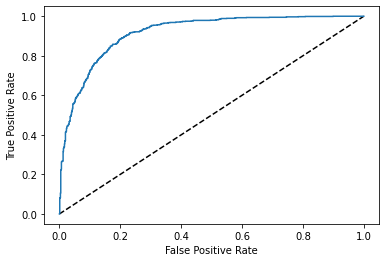

Score: 0.8411622379446759


In [94]:
#Auc Roc curve
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 1 in the x-test
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

#Visualising
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score)

Auc roc score and f1 score are equal. save the model

In [95]:
import joblib
joblib.dump(rf,'customer_churn.obj')

['customer_churn.obj']